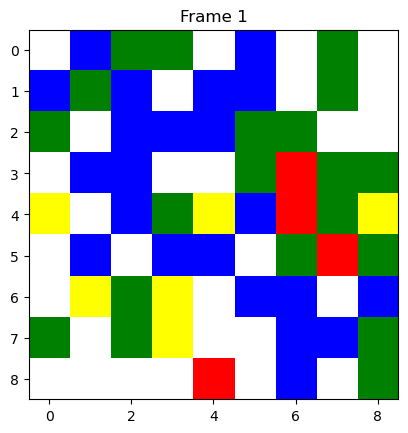

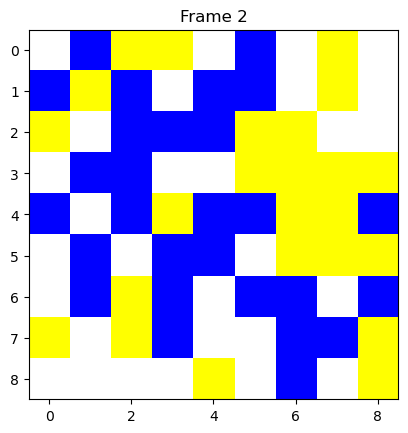

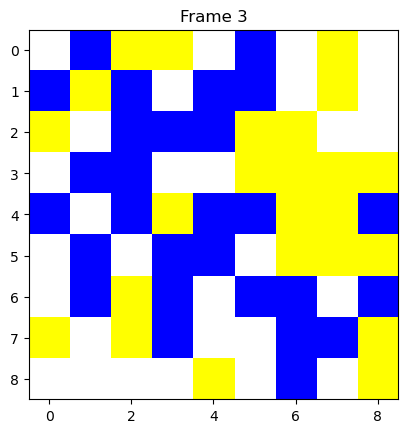

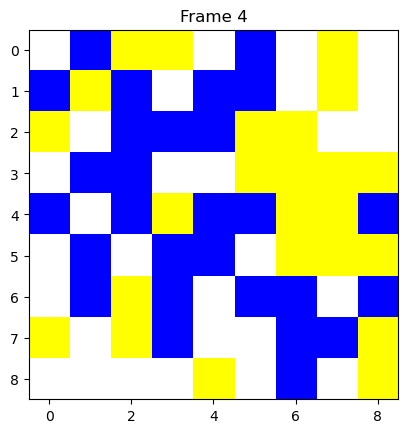

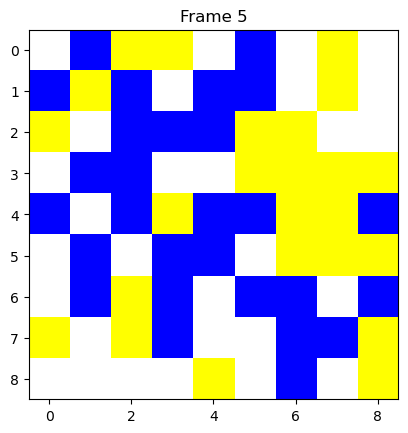

In [19]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np

# Read the txt file and extract the dimensions and frames
with open('/home/radhikasahai/chem_274B/Chem274B_Final_Project/Bin/Test_COVID_CAframe_output.txt', 'r') as file:
    lines = file.readlines()
    dim_line = lines[0].split('\t')
    dim1, dim2 = int(dim_line[0]), int(dim_line[1])

    frames = []
    for line in lines[1:]:
        frame = [int(cell) for cell in line.split('\t')[:-1]]  # Exclude the last empty element
        frames.append(frame)

# Reshape each frame into a 2D matrix
frames_matrix = np.array(frames).reshape(len(frames), dim1, dim2)

# Define a custom colormap
cmap_custom = ListedColormap(['white', 'red', 'yellow', 'green', 'blue'])

# Create a visualization for each frame
for i, frame in enumerate(frames_matrix):
    plt.imshow(frame, cmap=cmap_custom, interpolation='nearest')
    plt.title(f'Frame {i+1}')
    plt.show()


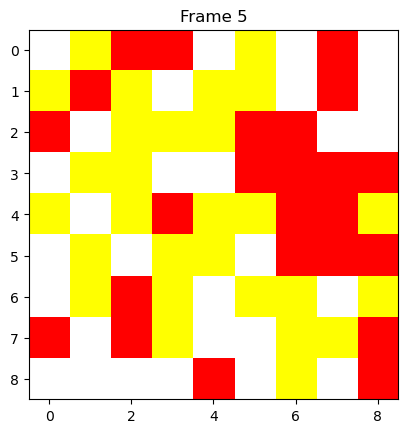

In [28]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib.animation import FuncAnimation
import numpy as np

# Read the txt file and extract the dimensions and frames
with open('/home/radhikasahai/chem_274B/Chem274B_Final_Project/Bin/Test_COVID_CAframe_output.txt', 'r') as file:
    lines = file.readlines()
    dim_line = lines[0].split('\t')
    dim1, dim2 = int(dim_line[0]), int(dim_line[1])

    frames = []
    for line in lines[1:]:
        frame = [int(cell) for cell in line.split('\t')[:-1]]  # Exclude the last empty element
        frames.append(frame)

# Reshape each frame into a 2D matrix
frames_matrix = np.array(frames).reshape(len(frames), dim1, dim2)

# Define a custom colormap
cmap_custom = ListedColormap(['white', 'red', 'yellow', 'green', 'blue'])

# Set up the figure and axis
fig, ax = plt.subplots()
img = ax.imshow(frames_matrix[0], cmap=cmap_custom, interpolation='nearest')

# Update function for animation
def update(frame):
    img.set_array(frames_matrix[frame])
    ax.set_title(f'Frame {frame + 1}')
    return img,

# Create animation
animation = FuncAnimation(fig, update, frames=len(frames_matrix), interval=200, repeat=True, repeat_delay=1000)

# Save the animation to a GIF file (adjust the filename as needed)
animation.save('/home/radhikasahai/chem_274B/Chem274B_Final_Project/Utils/Plots/COVID_CA.gif', writer='pillow', fps=5)

plt.show()


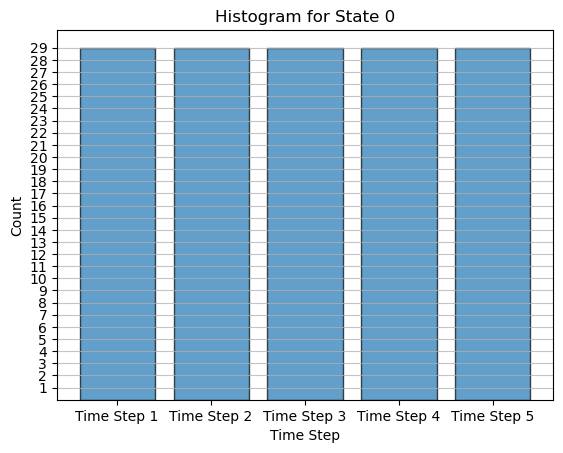

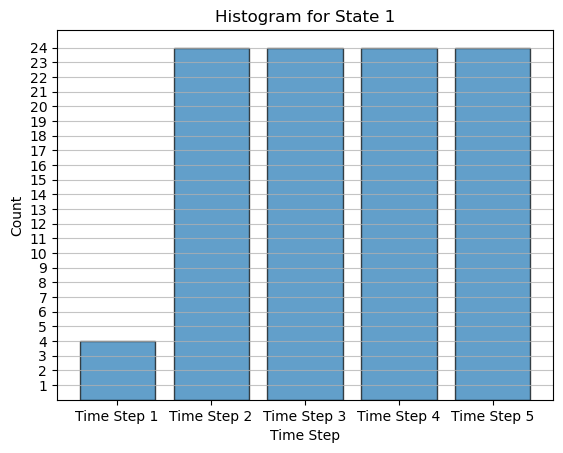

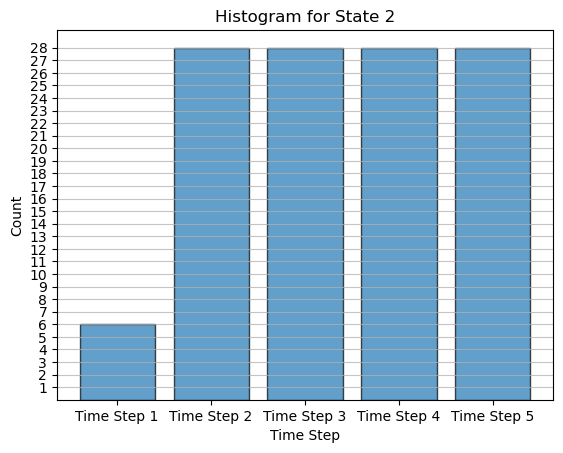

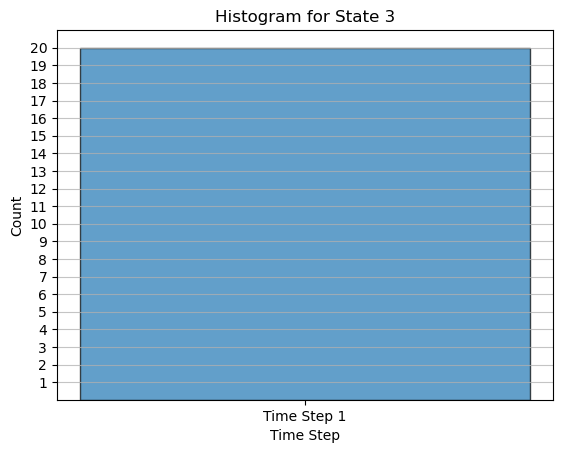

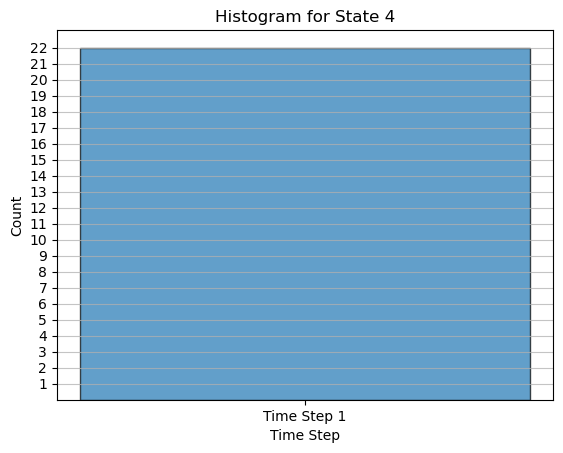

In [47]:
import matplotlib.pyplot as plt
from collections import defaultdict

# Read the data from the text file
with open('/home/radhikasahai/chem_274B/Chem274B_Final_Project/Bin/Test_COVID_CAcellState_output.txt', 'r') as f:
    lines = f.readlines()

# Process the data
data = defaultdict(list)
for line in lines[1:]:  # Skip the header
    pairs = line.split()
    for pair in pairs:
        state, count = map(int, pair.split(','))
        data[state].append(count)

# Create a histogram for each state
for state in range(5):  # Loop over states 0-4
    counts = data[state]
    plt.figure()
    plt.bar(range(1, len(counts) + 1), counts, alpha=0.7, edgecolor='black')
    plt.title(f'Histogram for State {state}')
    plt.xticks(range(1, len(counts) + 1), labels=[f'Time Step {i}' for i in range(1, len(counts) + 1)])
    plt.yticks(range(1, max(counts) + 1))
    plt.xlabel('Time Step')
    plt.ylabel('Count')
    plt.grid(axis='y', alpha=0.75)
    plt.show()
